In [380]:
#Importing Libraries,
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [381]:
#Dislay max columns and rows,
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [382]:
#Load dataset,
data = pd.read_excel("Product groups.xlsx")

In [383]:
data

,Product Family,Sum of count of orders,Avg product weight in Kg
0,agro industry and commerce,212,5.263405
1,foods,510,0.923415
2,food drinks,278,1.307933
3,Arts,209,1.691764
4,arts and crafts,24,1.164579
5,artigos de festas,43,2.705769
6,artigos de natal,153,1.849815
7,Audio,364,0.641638
8,automotive,4235,2.654651
9,babies,3065,3.655202


In [384]:
data.describe(include= 'all')

,Product Family,Sum of count of orders,Avg product weight in Kg
count,73,73.000000,73.000000
unique,73,NaN,NaN
top,bed table banho,NaN,NaN
freq,1,NaN,NaN
mean,NaN,1521.191781,2.711658
std,NaN,2582.713020,2.944816
min,NaN,2.000000,0.236506
25%,NaN,76.000000,0.812500
50%,NaN,278.000000,1.736173
75%,NaN,1691.000000,3.103777


In [385]:
data.columns

Index(['Product Family', 'Sum of count of orders', 'Avg product weight in Kg'], dtype='object')

In [386]:
data.shape

(73, 3)

In [387]:
data.isnull().sum()

Product Family              0
Sum of count of orders      0
Avg product weight in Kg    0
dtype: int64

In [388]:
data.dtypes

Product Family               object
Sum of count of orders        int64
Avg product weight in Kg    float64
dtype: object

In [389]:
data['Sum of count of orders'].unique()

array([  212,   510,   278,   209,    24,    43,   153,   364,  4235,
        3065,   379,  9670,  4117, 11115,   434,    30,   604,    14,
          72,   297,  1137,   929,   103,   304,   238,   194,  3796,
          64,   771,  2767,   679,  8641,  2031,   262,    48,     8,
         132,   131,  4347,    33,    39,   268,  7827,   680,    60,
         553,   267,  1092,   311,    38,   281,  8334,  1691,   109,
         503,  2517,     9,   203,  3419,  1947,    76,    15,  5991,
           2,   199,    83,  4545,   264,  6964])

In [390]:
data['Avg product weight in Kg'].unique()

array([ 5.26340541,  0.92341463,  1.30793269,  1.69176364,  1.16457895,
        2.70576923,  1.84981538,  0.64163793,  2.65465053,  3.65520153,
        1.73617284,  1.43479378,  1.86935648,  2.45640508,  3.80045045,
        1.4676    ,  3.39571556,  0.55      ,  0.79578571,  4.45995968,
        0.63665931,  3.5500525 ,  1.04782051,  2.28096154,  2.40103409,
        0.95076923,  2.56657921,  0.3815625 ,  1.97965405,  9.91333333,
        1.27508511,  4.01239827,  2.02467074,  0.42676443,  1.04450867,
        0.34473684,  0.57222222,  0.324     ,  0.55973684,  0.36226415,
        3.10377689,  1.40357143,  1.0375    ,  5.92919118,  0.89837767,
        3.36103806,  4.35      ,  0.59677419,  0.74661111,  1.10784553,
        3.72328367,  1.54410577, 13.19      , 11.59856383,  3.00826684,
       12.74086731,  9.99722222,  8.93484615,  1.21351852,  1.76311307,
        1.42966667,  7.99533333,  0.52925691,  3.08885675,  3.07151613,
        2.5175    ,  0.50928743,  0.8125    ,  2.9698172 ,  0.38

<AxesSubplot:xlabel='Sum of count of orders', ylabel='Avg product weight in Kg'>

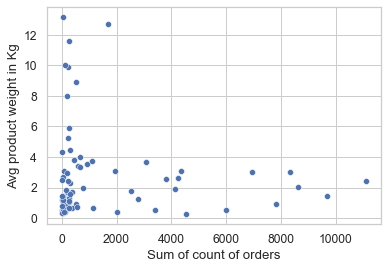

In [391]:
#Plotting Scatterplot,
sns.scatterplot(data=data, x='Sum of count of orders',y='Avg product weight in Kg' )

##### Looking at the scatterplot we can understand that,
 - average weight of the product family is approximately ranging from 0 to 14 kgs, 
 - Sum of count of orders of has a higher range from 0 to 10,000+
##### Therefore, we need to do something about the scale of this distribution

- Also, we can clearly see that the values in X axis ie..Sum of count of orders are too large/deviated/spreadout so trying to clusters this dataset in this state, clusters will tend to be formed only on the x dimension or will be dominating so we need to bring the range of feature of both x and y axis to a standdard or normalize it. 

- Hence, I will be using MinMaxScaler to do so. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution. 

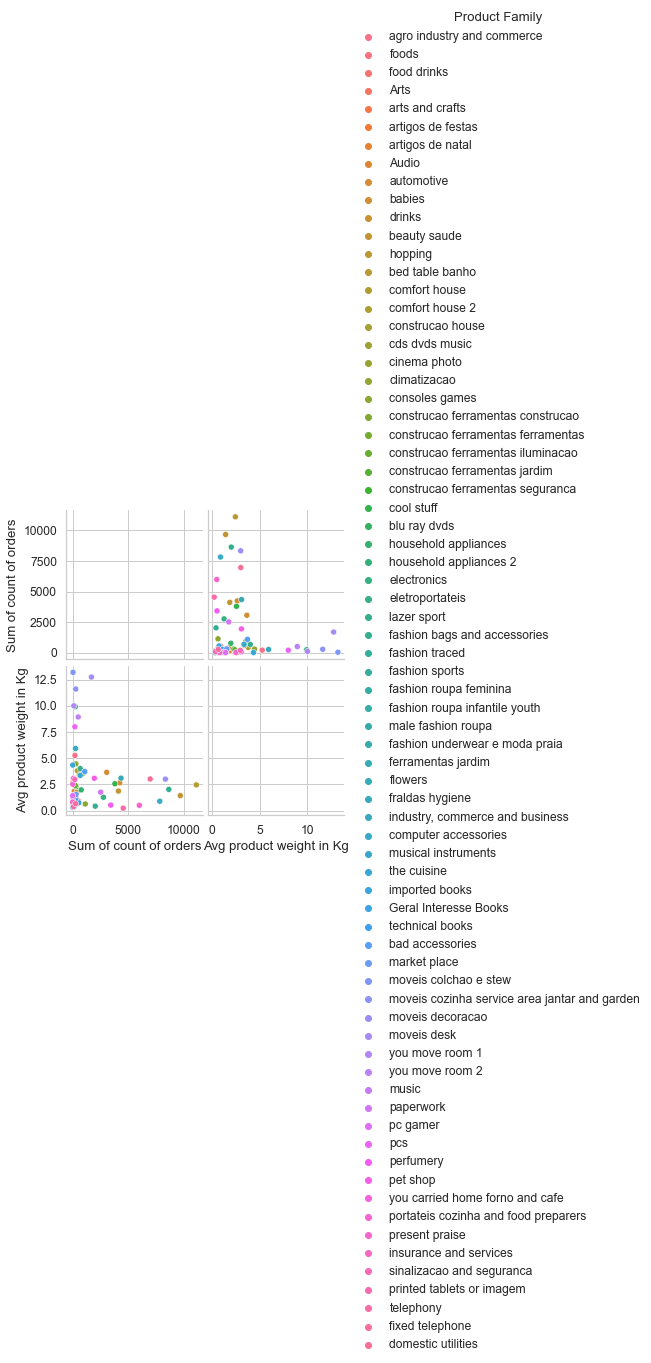

In [392]:
#Plotting Pairplot,
sns.pairplot(data, hue='Product Family')
plt.savefig('Pairplot.png')

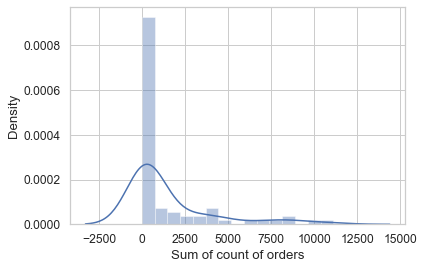

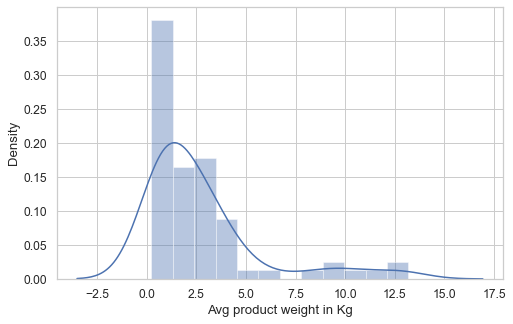

In [393]:
#Plotting Distplot,
columns = ['Sum of count of orders', 'Avg product weight in Kg']
for columns in columns:
    plt.figure()
    sns.distplot(data[columns])
    sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
    plt.savefig('Distplot.png', bbox_inches= 'tight')

##### The above Distplot show us that,
- Numerical variables are following a Right-skewed distrubtion.So, performing a log transformation will bring the distrubtion closer to the gaussian-distribution.

### FEATURE ENGINEERING & FEATURE SCALING :


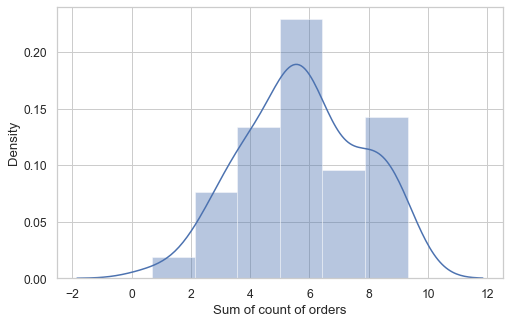

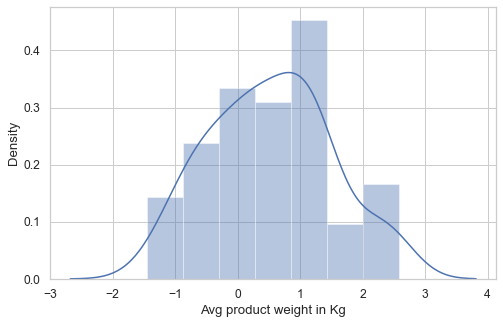

In [394]:
#log transformation

columns = ['Sum of count of orders', 'Avg product weight in Kg']
for columns in columns:
    data[columns]= np.log(data[columns])
    plt.figure()
    sns.distplot(data[columns]) 
    plt.savefig('LogTransformation.png', bbox_inches= 'tight')

In [395]:
data['Sum of count of orders'].sort_values(ascending = True)

67    0.693147
37    2.079442
60    2.197225
46    2.639057
17    2.639057
65    2.708050
4     3.178054
35    3.401197
15    3.401197
41    3.496508
58    3.637586
52    3.637586
42    3.663562
5     3.761200
36    3.871201
47    4.094345
27    4.158883
18    4.276666
64    4.330733
69    4.418841
22    4.634729
56    4.691348
39    4.875197
38    4.882802
6     5.030438
25    5.267858
68    5.293305
61    5.313206
3     5.342334
0     5.356586
29    5.472271
24    5.472271
34    5.568345
71    5.575949
49    5.587249
43    5.590987
2     5.627621
53    5.638355
19    5.693732
23    5.717028
51    5.739793
7     5.897154
10    5.937536
14    6.073045
57    6.220590
1     6.234411
48    6.315358
16    6.403574
31    6.520621
45    6.522093
28    6.647688
21    6.834109
50    6.995766
20    7.036148
55    7.433075
63    7.574045
33    7.616284
59    7.830823
30    7.925519
9     8.027803
62    8.137103
26    8.241703
12    8.322880
8     8.351139
40    8.377241
70    8.421783
66    8.69

In [396]:
data['Sum of count of orders'].max()

9.316050826398296

### MinMax Normalization:

In [397]:
#create two separate variables to get the count and weight for the Product family after applying MinMax Normalization!

data['count_variable'] = (data['Sum of count of orders'] - data['Sum of count of orders'].min()) / (data['Sum of count of orders'].max() - data['Sum of count of orders'].min())

data['weight_variable'] = (data['Avg product weight in Kg'] - data['Avg product weight in Kg'].min()) / (data['Avg product weight in Kg'].max() - data['Avg product weight in Kg'].min())

In [398]:
data

,Product Family,Sum of count of orders,Avg product weight in Kg,count_variable,weight_variable
0,agro industry and commerce,5.356586,1.660778,0.540820,0.771543
1,foods,6.234411,-0.079677,0.642622,0.338727
2,food drinks,5.627621,0.268448,0.572252,0.425299
3,Arts,5.342334,0.525772,0.539167,0.489290
4,arts and crafts,3.178054,0.152360,0.288175,0.396430
5,artigos de festas,3.761200,0.995386,0.355803,0.606074
6,artigos de natal,5.030438,0.615086,0.502997,0.511501
7,Audio,5.897154,-0.443731,0.603510,0.248195
8,automotive,8.351139,0.976313,0.888099,0.601330
9,babies,8.027803,1.296151,0.850602,0.680868


In [399]:
data_copy = data[['Product Family', 'count_variable', 'weight_variable']]
data_copy

,Product Family,count_variable,weight_variable
0,agro industry and commerce,0.540820,0.771543
1,foods,0.642622,0.338727
2,food drinks,0.572252,0.425299
3,Arts,0.539167,0.489290
4,arts and crafts,0.288175,0.396430
5,artigos de festas,0.355803,0.606074
6,artigos de natal,0.502997,0.511501
7,Audio,0.603510,0.248195
8,automotive,0.888099,0.601330
9,babies,0.850602,0.680868


In [400]:
clustering = KMeans(n_clusters=5)
clustering.fit(data_copy[['count_variable','weight_variable']])
data_copy['count and weight Cluster'] =clustering.labels_
data_copy.head()

,Product Family,count_variable,weight_variable,count and weight Cluster
0,agro industry and commerce,0.540820,0.771543,0
1,foods,0.642622,0.338727,3
2,food drinks,0.572252,0.425299,4
3,Arts,0.539167,0.489290,4
4,arts and crafts,0.288175,0.396430,1


In [401]:
clustering.cluster_centers_

array([[0.53580242, 0.85965675],
       [0.32078652, 0.22928741],
       [0.83522314, 0.59638113],
       [0.7650099 , 0.22443115],
       [0.47726339, 0.48679949]])

In [402]:
clustering.inertia_

1.8150981081970032

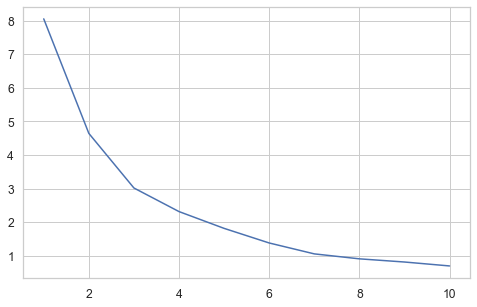

In [403]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data_copy[['count_variable','weight_variable']])
    intertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11),intertia_scores)

In [404]:
intertia_scores

[8.054299752374023,
 4.6434668160079715,
 3.017468659233141,
 2.314977297986733,
 1.8150773315676032,
 1.3800697768997412,
 1.0554719384933744,
 0.9077984297209445,
 0.8131672419173289,
 0.6960999994480259]

In [405]:
data_copy.groupby(['count and weight Cluster'])['count_variable', 'weight_variable'].mean()

,count_variable,weight_variable
count and weight Cluster,,
0,0.535802,0.859657
1,0.320787,0.229287
2,0.835223,0.596381
3,0.765010,0.224431
4,0.477263,0.486799


In [406]:
Average_count= data_copy.groupby(['count and weight Cluster'])['count_variable'].mean() 
Average_count

count and weight Cluster
0    0.535802
1    0.320787
2    0.835223
3    0.765010
4    0.477263
Name: count_variable, dtype: float64

In [407]:
Average_weight= data_copy.groupby(['count and weight Cluster'])['weight_variable'].mean()
Average_weight


count and weight Cluster
0    0.859657
1    0.229287
2    0.596381
3    0.224431
4    0.486799
Name: weight_variable, dtype: float64

In [408]:
#creating a datframe to get the average of count and weight variables with each cluster
df = pd.DataFrame(data_copy.groupby(['count and weight Cluster'])['count_variable', 'weight_variable'].mean())
df

,count_variable,weight_variable
count and weight Cluster,,
0,0.535802,0.859657
1,0.320787,0.229287
2,0.835223,0.596381
3,0.765010,0.224431
4,0.477263,0.486799


<AxesSubplot:xlabel='count_variable', ylabel='weight_variable'>

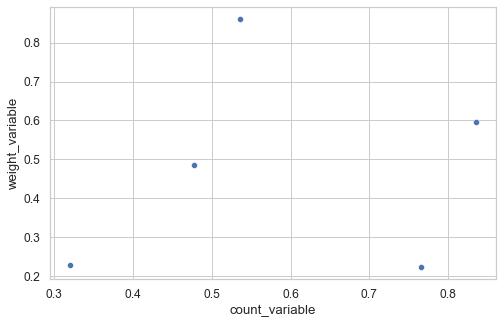

In [409]:
#Centroids of each cluster 
sns.scatterplot(data=df, x='count_variable',y='weight_variable')

In [410]:
centroids =pd.DataFrame(clustering.cluster_centers_)
centroids.columns = ['x','y']

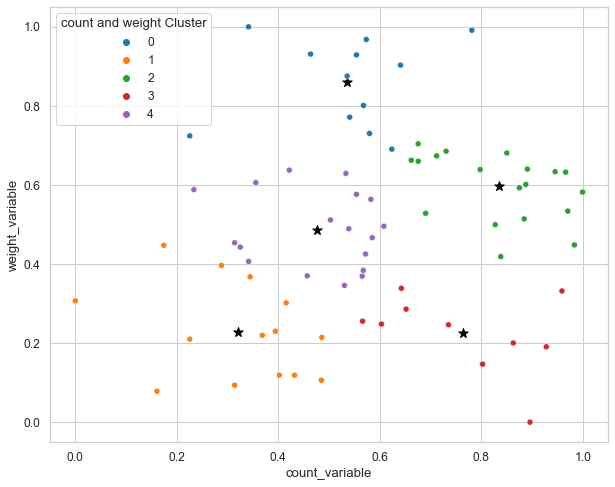

In [411]:
plt.figure(figsize=(10,8))
plt.scatter(x=centroids['x'],y=centroids['y'],s=100,c='black',marker='*')
sns.scatterplot(data=data_copy, x ='count_variable',y='weight_variable',hue='count and weight Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

#### In the above scatterplot,
 - we can see the centroids of each cluster(Centers) which are spread out between (0 to1)

### NOTE: 
#### Since, the KMeans Clustering Algorithm is generating clusters randomly in clusters of 5, the cluster visualization keeps changing. But, the Likelihood of the Product Family to fit the Best Cluster will remain same. ie.. It will be grouped with the same Product Family clusters each time, only the cluster number changes. 

### WHAT FILES WILL I UPLOAD NEXT???
- How do we place the particular Product Family and choose the best cluster for it based on the changing in trends of "Low Frequency" to "High Frequency" ?
- Building and Testing the best fit ML model and training it for new data trends.
- OOPS in PYTHON for Automating this Process.

In [415]:
Final_data = pd.concat([data_copy,df]) 
Final_data

,Product Family,count_variable,weight_variable,count and weight Cluster
0,agro industry and commerce,0.540820,0.771543,0.0
1,foods,0.642622,0.338727,3.0
2,food drinks,0.572252,0.425299,4.0
3,Arts,0.539167,0.489290,4.0
4,arts and crafts,0.288175,0.396430,1.0
5,artigos de festas,0.355803,0.606074,4.0
6,artigos de natal,0.502997,0.511501,4.0
7,Audio,0.603510,0.248195,3.0
8,automotive,0.888099,0.601330,2.0
9,babies,0.850602,0.680868,2.0


In [417]:
Final_data.to_csv('Clustered.csv')